<a href="https://colab.research.google.com/github/camilamenezzzes/Analise-Dataset-Pima/blob/main/Dataset_Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================================================
# Pima Indians Diabetes Database
# =========================================================
# Regressão Logística (supervisionado)

# Importa as bibliotecas necessárias para análise de dados, visualização e modelagem.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importa módulos do scikit-learn para divisão de dados, pré-processamento, pipeline,
# regressão logística e métricas de avaliação.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# **Coleta / Limpeza / Leitura / Análise Exploratória de Dados**

In [ ]:
#Os conjuntos de dados consistem em diversas variáveis ​​preditoras médicas (independentes) e uma variável alvo (dependente), o Desfecho . As variáveis ​​independentes
#incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade, entre outras.

#Colunas:

# Pregnancies: Número de vezes que esteve grávida
# Glucose: Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose
# BloodPressure: Pressão arterial diastólica (mm Hg)
# SkinThickness: Espessura da prega cutânea do tríceps (mm)
# Insulin: Insulina sérica de 2 horas (µU/ml)
# BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
# DiabetesPedigree: Histórico de diabetes
# Age: Anos
# Outcome: Variável de classe (0 ou 1): 268 de 768 são 1, os demais são 0.

In [ ]:
# Dataset disponível no Kaggle:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# (Baixar e enviar o arquivo student-mat.csv ou student-por.csv)

# Carrega o dataset 'diabetes.csv' em um DataFrame pandas, usando ',' como separador.
# Rerunning this cell will reset the DataFrame 'df' to its initial state.
df = pd.read_csv("/content/diabetes.csv", sep=',')

# Imprime as dimensões (número de linhas e colunas) do DataFrame.
print("Dimensões:", df.shape)

# Exibe as primeiras 5 linhas do DataFrame para uma prévia dos dados.
df.head(5)

Dimensões: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Exibe informações sobre o DataFrame, incluindo o tipo de dados de cada coluna e a contagem de valores não nulos.
df.info()

# Verifica se há valores nulos em cada coluna e exibe o resultado (True se houver nulo, False caso contrário).
df.isnull().any()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
# procura por dados duplicados
df.duplicated().value_counts()

,count
False,768


In [ ]:
df.describe().T # somente dados númericos

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.describe(include="all").T # inclue dados categóricos (qualitativos)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#**Visualização dos Dados**

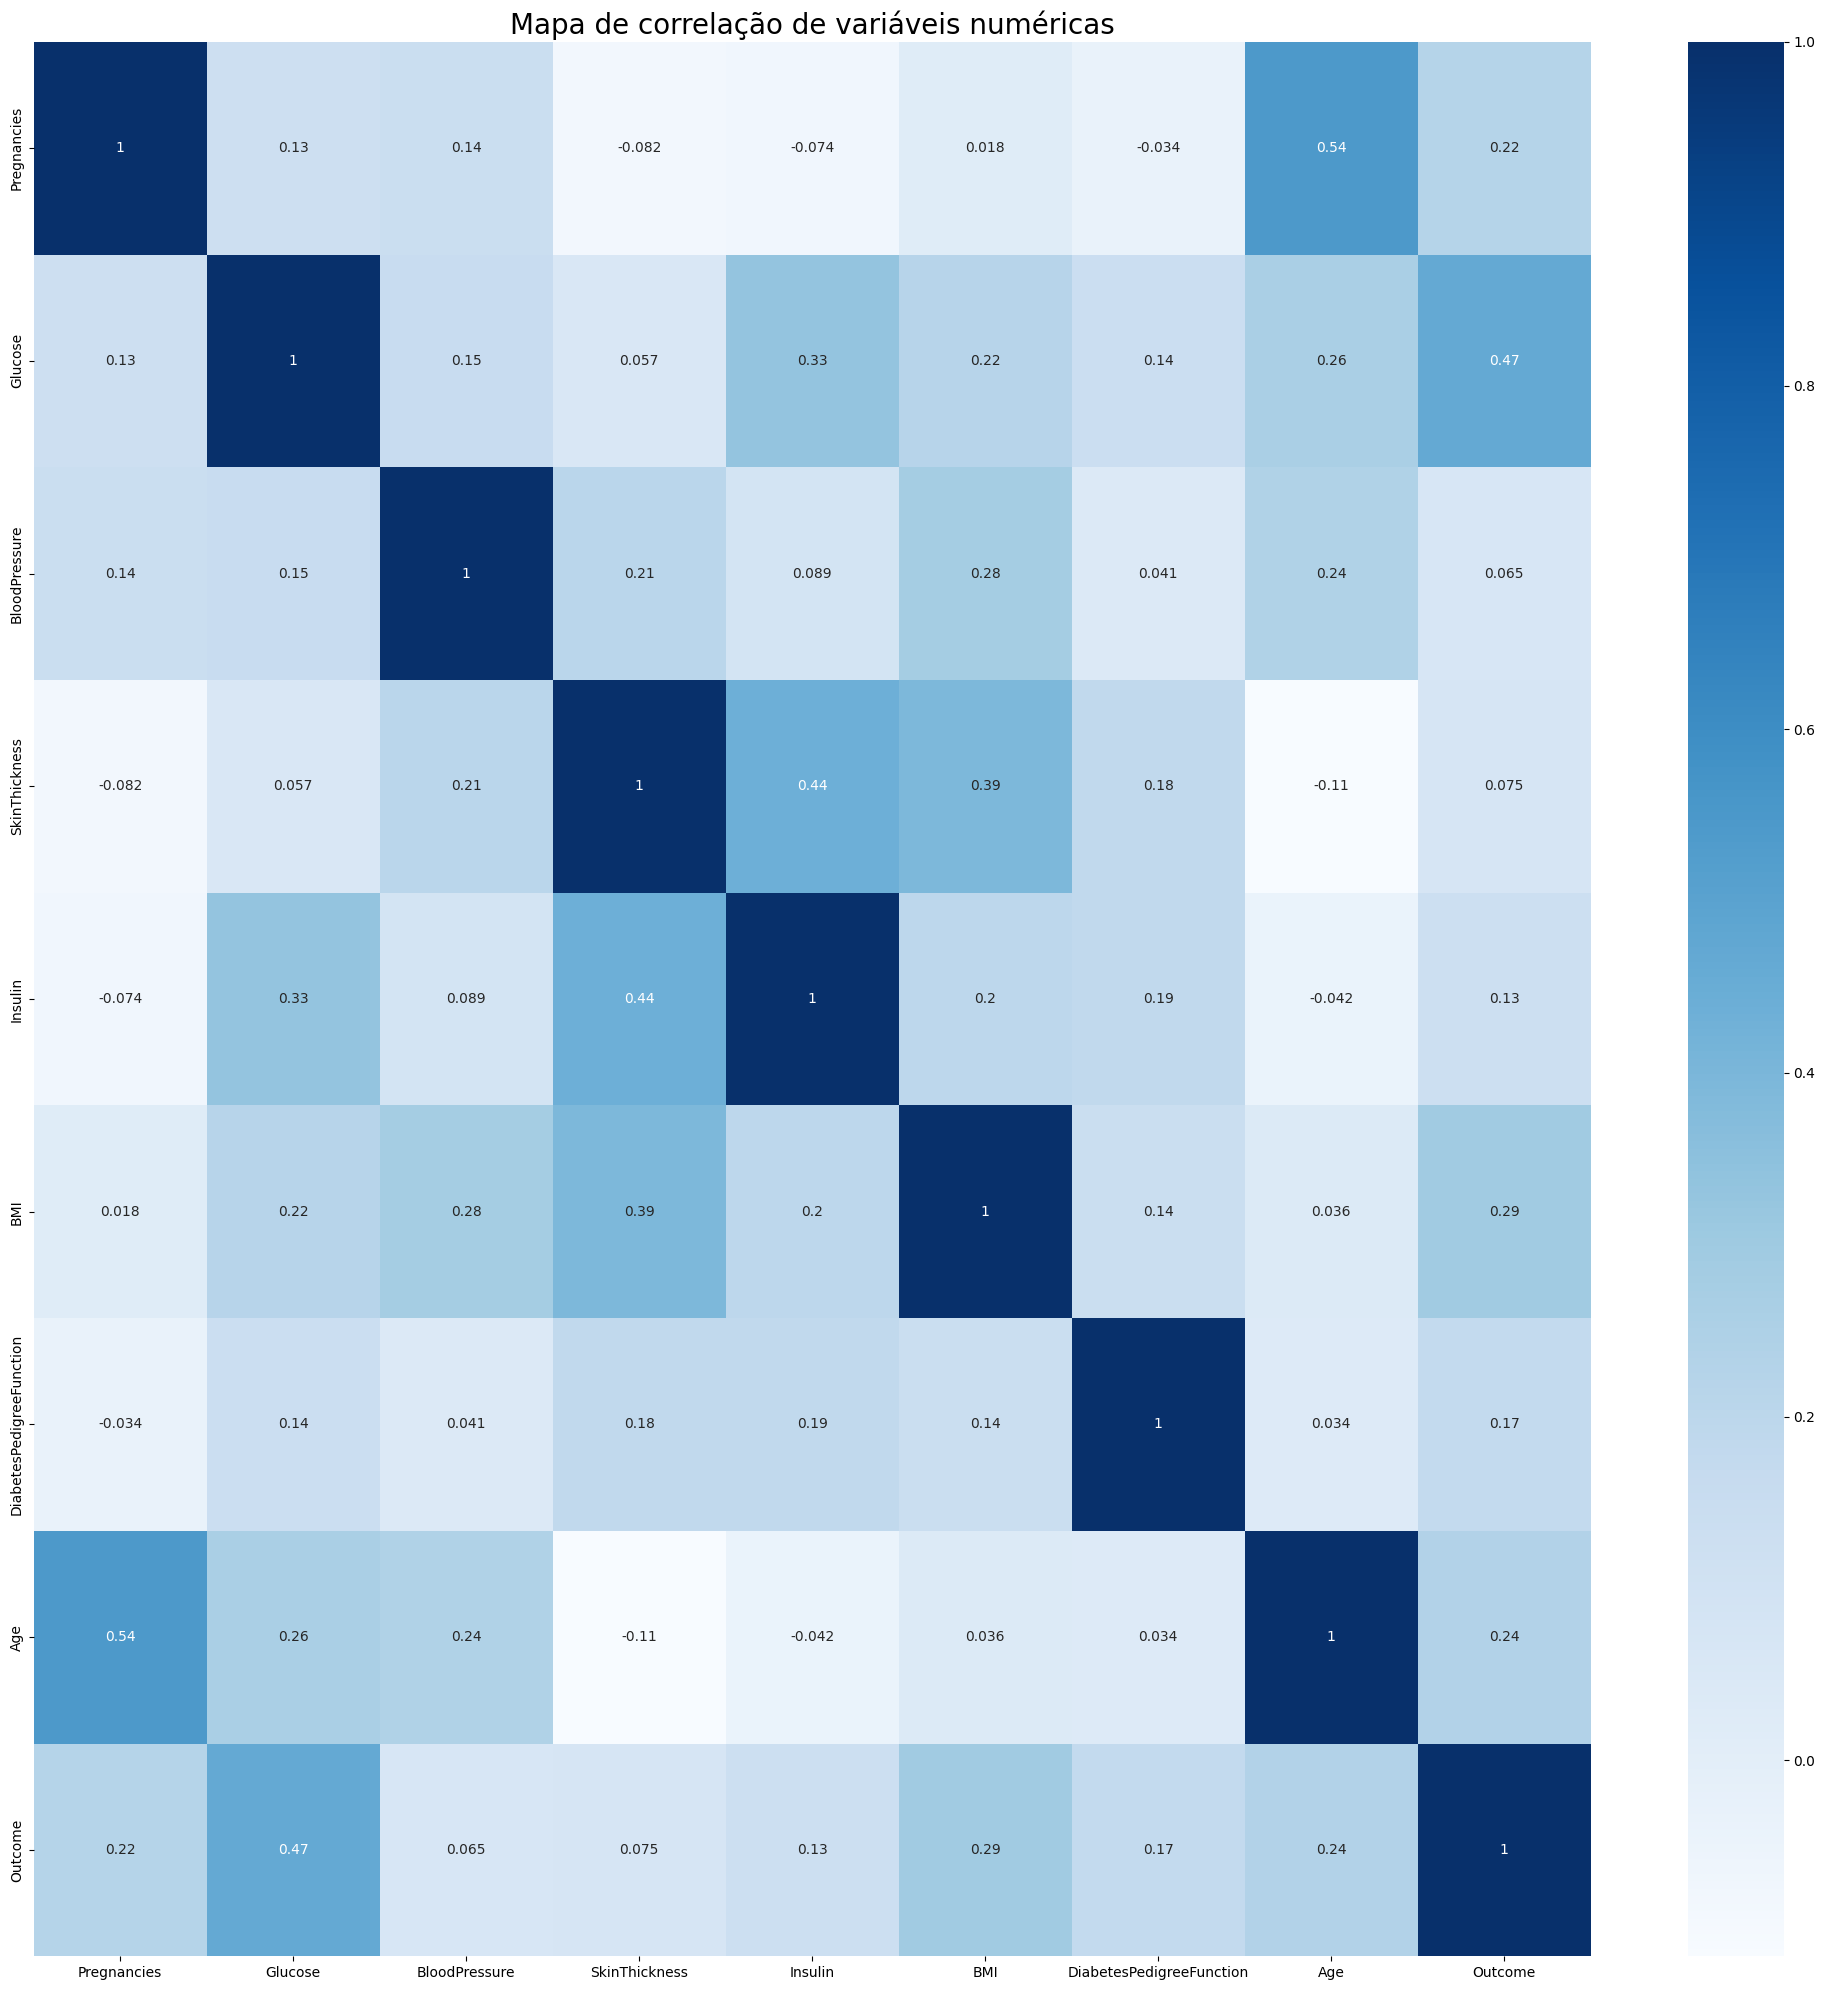

In [ ]:
# Correlação não IMPLICA em causalidade

# Calcula a matriz de correlação para as colunas numéricas do DataFrame.
# A correlação mede a relação linear entre duas variáveis numéricas, variando de -1 a 1.
# Um valor próximo a 1 indica uma forte correlação positiva (à medida que uma variável aumenta, a outra também aumenta).
# Um valor próximo a -1 indica uma forte correlação negativa (à medida que uma variável aumenta, a outra diminui).
# Um valor próximo a 0 indica pouca ou nenhuma correlação linear.
corr = df.select_dtypes(include=np.number).corr()

# Cria uma figura e um eixo para o heatmap com um tamanho específico.
plt.figure(figsize=(20,20))

# Gera o heatmap da matriz de correlação.
# O heatmap é uma representação visual da matriz de correlação, onde as cores representam a força e a direção da correlação entre os pares de variáveis.
# Ele é útil para identificar rapidamente quais variáveis numéricas estão fortemente correlacionadas entre si.
# 'annot=True' exibe os valores de correlação nas células do heatmap.
# 'cmap="Reds"' define o mapa de cores para o heatmap (tons de vermelho, onde cores mais escuras indicam maior correlação).
sns.heatmap(corr, annot=True, cmap="Blues")

# Define o título do heatmap.
plt.title('Mapa de correlação de variáveis numéricas', fontsize=20)

# Ajusta o layout para evitar que os rótulos se sobreponham.
plt.tight_layout()

# Exibe o plot.
plt.show()

# Insights:
# a) As notas dos períodos anteriores ('G1' e 'G2') têm uma correlação muito forte e positiva com a nota final ('G3') 0,83 0,92
# b) Número de reprovações anteriores (failures) tem uma correlação negativa moderada com 'G3' (-0.39)
# c) O nível de educação dos pais (Medu, Fedu) e o tempo de estudo semanal (studytime) têm associações positivas moderadas com a nota final (0.24, 0.21 e 0.25, respectivamente).

# a) A idade das indigenas Pima ('Age') tem correlação positiva moderada com a quantidade de gestações ('Pregnancies) (0.54)
# b) O IMC ('BMI') apresenta uma correlação positiva moderada com o diagnóstico de diabetes ('Outcome'), com um valor de 0.29
# c) O nível de glicose ('Glucose') tem relação positiva moderada com o resultado ('Outcome') da previsão do disgnóstico de diabetes. (0.47)

In [ ]:
# Gráfico de contagem (countplot)

# Agrupa o DataFrame pela quantidade de reprovações ('failures') e pelo sexo ('sex').
# Em seguida, conta o número de ocorrências de cada combinação e reseta o índice,
# nomeando a coluna de contagem como 'count'.
# Este DataFrame 'failure_counts' mostra quantos alunos tiveram uma determinada quantidade de reprovações
# e são de um determinado sexo.
failure_counts = df.groupby(["failures", "sex"]).size().reset_index(name="count")

# Imprime o DataFrame 'failure_counts' para visualizar a distribuição de reprovações
# por sexo.
print(failure_counts)

# Cria um gráfico de contagem (countplot) para visualizar a distribuição do número de reprovações ('failures').
# As barras são diferenciadas pelo sexo ('sex') usando o parâmetro 'hue'.
# Cada barra no eixo x representa um número de reprovações (0, 1, 2, 3), e as sub-barras
# coloridas dentro de cada uma mostram a distribuição por sexo para aquele
# número de reprovações.
sns.countplot(data=df, x="failures", hue="sex", palette="Blues")

# Define o título do plot para refletir que ele mostra a distribuição do número de reprovações
# por sexo.
plt.title('Distribuição do Número de Reprovações por Sexo')

# Adiciona rótulos aos eixos para maior clareza.
plt.xlabel('Número de Reprovações Anteriores')
plt.ylabel('Contagem de Alunos')

# Exibe o plot.
plt.show()

KeyError: 'failures'

#**Pré-Processamento dos Dados**

# **Pipeline - Regressão Logística (Supervisionado)**